# Introduction
## This notebook demonstrates the application of genetic algorithms to optimize two well-known benchmark test functions: Ackley and Rastrigin, which are commonly used for testing the performance of optimization algorithms.

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Functions Definition

In [2]:
def rastrigin(point):
    x = point[0]
    y = point[1]
    A = 10
    return A * 2 + (x ** 2 - A * np.cos(2 * np.pi * x)) + (y ** 2 - A * np.cos(2 * np.pi * y))

def ackley(point):
    x = point[0]
    y = point[1]
    a = 20
    b = 0.2
    c = 2 * np.pi

    term1 = -a * np.exp(-b * np.sqrt(0.5 * (x ** 2 + y ** 2)))
    term2 = -np.exp(0.5 * (np.cos(c * x) + np.cos(c * y)))
    return term1 + term2 + a + np.exp(1)

## 3D visualization of Rastrigin function

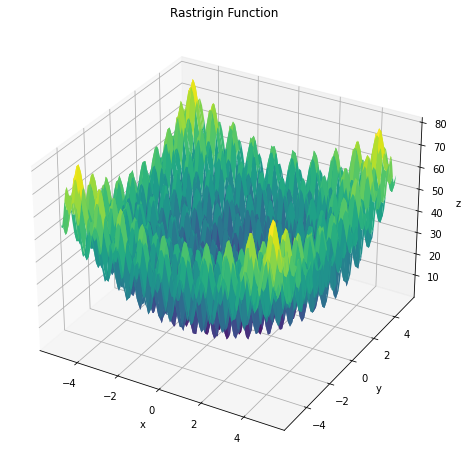

In [3]:
# Create a grid of x, y values
x_vals = np.linspace(-5.12, 5.12, 100)
y_vals = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Calculate the corresponding z values
Z = rastrigin([X, Y])

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='viridis')

# Set labels and title for 3D
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Rastrigin Function')

# Show the plot
plt.show()

## 3D visualization of Ackley function

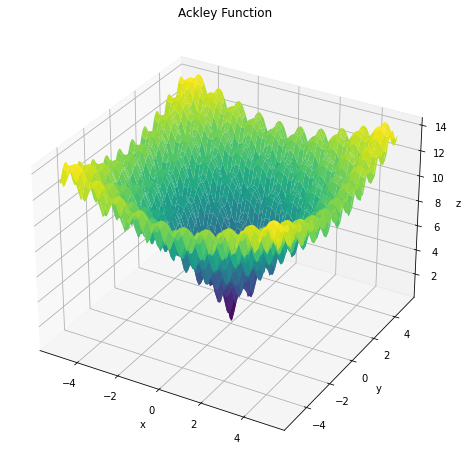

In [4]:
# Create a grid of x, y values
x_vals = np.linspace(-5.12, 5.12, 100)
y_vals = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Calculate the corresponding z values
Z = ackley([X, Y])

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='viridis')

# Set labels and title for 3D
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Ackley Function')

# Show the plot
plt.show()

## Definition of GA class

In [14]:
class Genetic_Algorithm:
    
    def __init__(self, Individuals=30,
       Generations=200,
       Crossover_prop = 0.9,
       Mutation_prop = 0.1):
        
        self.individuals = Individuals
        self.generations = Generations
        self.crossover_prop = Crossover_prop
        self.mutation_prop = Mutation_prop
      
    
    def roulette_wheel_selection(self, population, fitness):
        # Normalize the fitness values to obtain selection probabilities
        total_fitness = np.sum(fitness)
        probabilities = fitness / total_fitness
    
        # Calculate cumulative probabilities
        cumulative_probabilities = np.cumsum(probabilities)
    
        # Spin the wheel (random number between 0 and 1)
        rand_1 = np.random.rand()
        rand_2 = np.random.rand()      
        parents = [0]*2
    
        # Select the individual based on where the random number falls in the cumulative probabilities
        for i, cumulative_probability in enumerate(cumulative_probabilities):
            if rand_1 < cumulative_probability:
                parents[0] = population[i]
                break
    
        for i, cumulative_probability in enumerate(cumulative_probabilities):
            if rand_2 < cumulative_probability:
                parents[1] = population[i]
                if np.array_equal(parents[0], parents[1]):
                
                   if np.array_equal(parents[1], population[-1]):
                    
                      parents[1] = population[-2]
                
                   else:
                
                      parents[1] = population[i+1]
                    
                break
    
        return parents


    def Flat_crossover(self, parentss,n_parameters):
    
        offspring = [0]*2
    
        parent_min = np.minimum(parentss[0],parentss[1])
        parent_max = np.maximum(parentss[0],parentss[1])
        distance = abs(parent_max - parent_min)
                
        offspring[0] = parent_min + np.random.rand(n_parameters)*distance
        offspring[1] = parent_min + np.random.rand(n_parameters)*distance
    
        return offspring
    
    
    def optimize(self,obj,n_parameters,
       lower_bound,
       upper_bound):
        
        x_min = lower_bound
        x_max = upper_bound
        nx = n_parameters
        nP = self.individuals
        nG = self.generations
        Pc = self.crossover_prop
        Pm = self.mutation_prop
        
        solutions = np.zeros([nP,nx])
        results =  np.zeros([nP,1])
        Solutions_10iterations = []
        
        #### Initialization of first generation
        for i in range(nP):
            solutions[i] = x_min*np.ones([1,nx]) + np.random.rand(nx)*(x_max-x_min)
    
        #### Evaluate First generation 
        for i in range(nP):
            results[i] = obj(solutions[i])
    
        #### Best Candidate
        sol_best = [solutions[0]]
        res_best = [results[0]]
    

        for i in range(nP):
    
            if results[i] < res_best[0] : 
                res_best[0] = results[i]
                sol_best[0] = solutions[i]

    
        Solutions_10iterations.append(solutions)
        
        
        
        
        
        
        
        #### Evolution
        #### iterate over generations 
        for i in range(1,nG):
            
            new_solutions = np.zeros([nP,nx])
            fitness = 1 / (results + 1e-6)
            
            for j in range(0,nP,2):
                
                #### Selection
                parents = self.roulette_wheel_selection(solutions, fitness)
            
            
                #### Cross over
                rand_num = np.random.rand()
                offspring = [0]*2

                if rand_num <= Pc:
                    offspring = self.Flat_crossover(parents, nx)
                
                else:
                    offspring = parents
        
        
                #### Mutation
                rand_nums_1 = [np.random.rand() for i in range(nx)]
                rand_nums_2 = [np.random.rand() for i in range(nx)]
        
                for ii in range(len(rand_nums_1)):
                    if rand_nums_1[ii] <= Pm:
                        offspring[0][ii] = x_min[ii] + np.random.rand()*(x_max[ii]-x_min[ii])
                   
        
                for ii in range(len(rand_nums_2)):
                    if rand_nums_2[ii] <= Pm:
                        offspring[1][ii] = x_min[ii] + np.random.rand()*(x_max[ii]-x_min[ii])
                   
            
                #### Adding two offsprings to the new population
                new_solutions[j] = offspring[0]
                new_solutions[j+1] = offspring[1]
                
                
                
                
            #### bounds violation treatment 
            for j in range(nP):
        
                for k in range(nx):
            
                    if new_solutions[j,k] > x_max[k]:
                       new_solutions[j,k] = x_max[k]
            
                    if new_solutions[j,k] < x_min[k]:
                       new_solutions[j,k] = x_min[k]
                        
            
            #### Evaluate fitness of current generation
            new_results = np.zeros([nP,1])
            for ii in range(nP):
                new_results[ii] = obj(new_solutions[ii])
                
                
            #### Best Candidate
            sol_best.append(sol_best[-1])
            res_best.append(res_best[-1])
        

            for jj in range(nP):
    
                if new_results[jj] < res_best[-1] : 
                   res_best[-1] = new_results[jj]
                   sol_best[-1] = new_solutions[jj]
    
    
            solutions = new_solutions
            results = new_results
            
            if i % 10 == 0:
                Solutions_10iterations.append(solutions)
                
        Solutions_10iterations.append(solutions)
            
        return res_best,sol_best,Solutions_10iterations    

## Running the Algorithm 

In [32]:
x_max = np.array([5]*2)
x_min = np.array([-5]*2)
iterations = 40

GA = Genetic_Algorithm(10,iterations)
res = GA.optimize(ackley,2,x_min,x_max)
# res = GA.optimize(rastrigin,2,x_min,x_max)

## Visualizing the optimization process

Text(0, 0.5, 'Function Value')

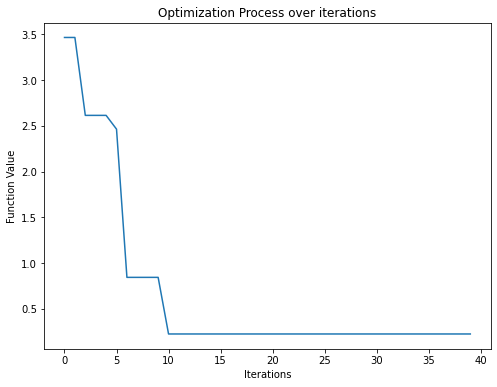

In [40]:
best_function_values = [res[0][i] for i in range(iterations)]
#print(best_function_values)
plt.figure(figsize=(8, 6))
plt.plot(best_function_values)
plt.title('Optimization Process over iterations')
plt.xlabel('Iterations')
plt.ylabel('Function Value')

## Visualizing the results

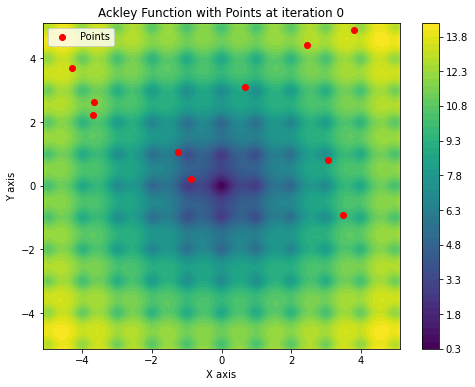

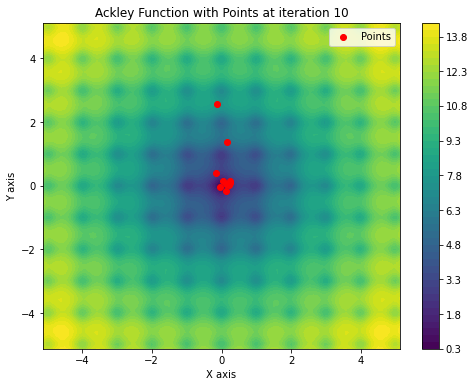

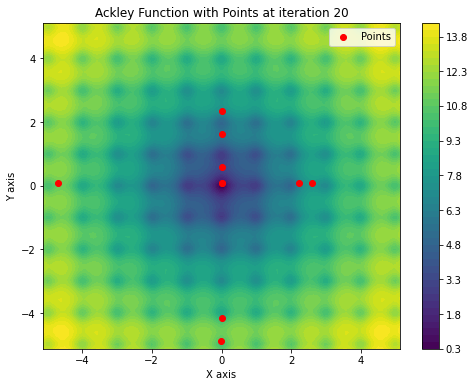

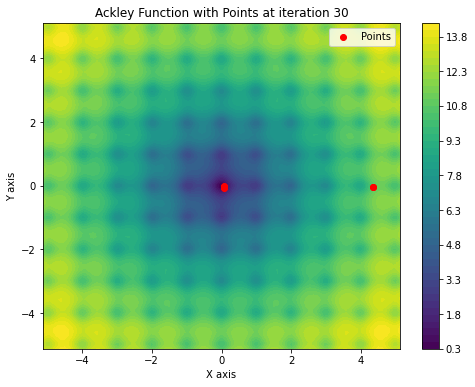

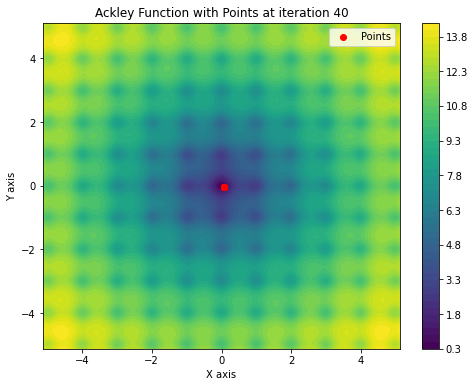

In [33]:
for i in range((iterations//10)+1):
    # Calculate Z values for the Rastrigin function over the grid
    Z = ackley([X, Y])
    # Z = rastrigin([X, Y])

    # Create the contour plot
    plt.figure(figsize=(8, 6))
    plt.contourf(X, Y, Z, levels=50, cmap='viridis')
    plt.colorbar()

    # Overlay the points on the contour plot
    plt.scatter(res[2][i][:, 0], res[2][i][:, 1], color='red', marker='o', label='Points')

    # Add labels and title
    plt.title('Ackley Function with Points at iteration '+str(i*10))
    #plt.title('Rastrigin Function with Points at iteration '+str(i*10))
    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    plt.legend()

    # Show the plot
    plt.show()